In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.dates as mdates
import matplotlib.colors as colors
import pandas as pd
import scipy as sp
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy import stats
from datetime import timedelta, datetime
import sympy as smp
from IPython.display import display, Math


# My own functions
import import_ipynb
import Functions

smp.init_printing()
%matplotlib inline

importing Jupyter notebook from Functions.ipynb


In [2]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

# Show the Changing Histogram With Temperature

In [3]:
upper_int = 100000
lower_int = 0
mode_std = 0.015

In [4]:
cold_path = 'datafiles/feb_8_2019/feb_8_run1_csv.csv'
warm_path = 'datafiles/feb_4_2019/feb_4_run2_csv.csv'

In [5]:
def get_df(path):
    
    df = pd.read_csv(path, sep=',', index_col=0).astype(float)
    df['ratio']=(df['Integral 1200']-df['Integral 0'])/(df['Integral 7400']-df['Integral 0'])
    df.index = pd.to_datetime(df.index,unit='s')-timedelta(hours=7)
        
    df = df[(df['ratio']<1) & (df['ratio']>0)] 
    df = df[(df['Integral 7400']<upper_int) & (df['Integral 7400']>lower_int)] 
    
    return df

In [6]:
df_cold = get_df(cold_path)
df_warm = get_df(warm_path)

In [7]:
[warm_mode, _, _], _ = Functions.mode_ratio(df_warm, mode_std)
[cold_mode, _, _], _ = Functions.mode_ratio(df_cold, mode_std)

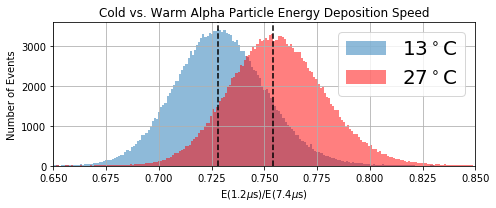

In [8]:
fig, ax = plt.subplots(figsize=(7,3))

df_cold['ratio'].hist(bins=1000, ax=ax, alpha=0.5, label='13$^\circ$C')
df_warm['ratio'].hist(bins=1000, ax=ax, alpha=0.5, color='r', label='27$^\circ$C')

ax.axvline(warm_mode, c='k', linestyle='--')
ax.axvline(cold_mode, c='k', linestyle='--')

ax.set_xlim(0.65,0.85)
ax.set_title('Cold vs. Warm Alpha Particle Energy Deposition Speed')
ax.set_xlabel('E(1.2$\mu$s)/E(7.4$\mu$s)')
ax.set_ylabel('Number of Events')

ax.legend(prop={'size': 20})
fig.tight_layout()
plt.savefig('plots/report_plots/coldvswarm.png', dpi=300)
plt.show()

In [9]:
[warm_mode_tote, _, _], _ = Functions.mode_energy(df_warm, mode_std)
[cold_mode_tote, _, _], _ = Functions.mode_energy(df_cold, mode_std)

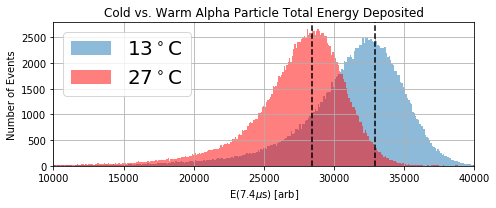

In [10]:
fig, ax = plt.subplots(figsize=(7,3))

df_cold['Integral 7400'].hist(bins=1000, ax=ax, alpha=0.5, label='13$^\circ$C')
df_warm['Integral 7400'].hist(bins=1000, ax=ax, alpha=0.5, color='r', label='27$^\circ$C')

ax.axvline(warm_mode_tote, c='k', linestyle='--')
ax.axvline(cold_mode_tote, c='k', linestyle='--')

ax.set_xlim(10000,40000)
ax.set_title('Cold vs. Warm Alpha Particle Total Energy Deposited')
ax.set_xlabel('E(7.4$\mu$s) [arb]')
ax.set_ylabel('Number of Events')

ax.legend(prop={'size': 20})
fig.tight_layout()
plt.savefig('plots/report_plots/coldvswarmtote.png', dpi=300)
plt.show()

## 2D Histogram Showing Change

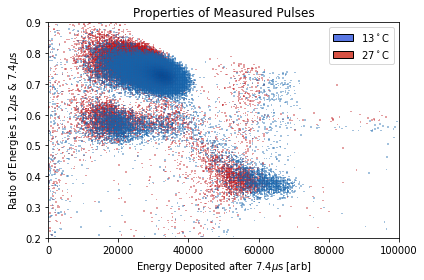

In [11]:
fig, ax = plt.subplots(figsize=(6,4))


red_cmap = cmap = plt.get_cmap('Reds')
red_cmap = truncate_colormap(red_cmap, 0.8, 0.9)
ax.hist2d(df_warm['Integral 7400'].values, df_warm['ratio'].values, alpha=0.4, label=r'13$^\circ$C',
          range=np.array([(0, 100000), (0.2, 0.9)]), bins=500, cmap=red_cmap, cmin=1)

blue_cmap = cmap = plt.get_cmap('Blues')
blue_cmap = truncate_colormap(blue_cmap, 0.8, 0.9)
ax.hist2d(df_cold['Integral 7400'].values, df_cold['ratio'].values, alpha=0.4,
          range=np.array([(0, 100000), (0.2, 0.9)]), bins=500, cmap=blue_cmap, cmin=1)



ax.set_xlabel('Energy Deposited after 7.4$\mu$s [arb]')
ax.set_ylabel('Ratio of Energies 1.2$\mu$s & 7.4$\mu$s')
ax.set_title('Properties of Measured Pulses')


cmap = plt.get_cmap('coolwarm')
blue = cmap(0.1)
red = cmap(0.9)

handles = [plt.Rectangle((0,0),1,1,color=c,ec="k") for c in [blue, red]]
labels= [r'13$^\circ$C',r'27$^\circ$C']
ax.legend(handles, labels)

fig.tight_layout()
plt.savefig('plots/report_plots/e_2d_tempchange.png', dpi=300)
plt.show()